# Three Qubit Swap Problem

In this notebook we look at the results of the free-time and min-time solutions for a three qubit swap gate.  The free-time script can be found at [swap.jl](swap.jl) and the min-time script can be found at [swap_mintime.jl](swap_mintime.jl).

In [1]:
using Piccolo
using LinearAlgebra
using SparseArrays
using JLD2

## Load the free-time solution

In [2]:
data_path = "results/T_240_init_duration_100.0_max_iter_250_00000.jld2"

"results/T_240_init_duration_100.0_max_iter_250_00000.jld2"

In [3]:
data = load_problem(data_path; return_data=true)

Loading data dict from results/T_240_init_duration_100.0_max_iter_250_00000.jld2:

   fidelity = 0.9993489301517718
   pulse duration = 193.981157899471


Dict{String, Any} with 7 entries:
  "options"        => Options{Float64}(1.0e-8, 100.0, 250, 1.0e6, 1.0, 1.0e-6, …
  "integrators"    => AbstractIntegrator[UnitaryPadeIntegrator{Float64}(sparse(…
  "fidelity"       => 0.999349
  "params"         => Dict{Symbol, Any}(:eval_hessian=>true, :objective_terms=>…
  "system"         => QuantumSystem{Float64}([0.0 0.0 … 0.0 0.0; 0.0 -0.376991 …
  "trajectory"     => NamedTrajectory{Float64}([1.0 1.0 … 0.993757 0.999932; 0.…
  "pulse duration" => 193.981

In [4]:
traj = data["trajectory"]

NamedTrajectory{Float64}([1.0 1.0000000000000222 … 0.9937565648546568 0.9999320178268816; 0.0 -1.1514001196282475e-12 … 0.01829782563899662 0.014361951257784547; … ; 0.030274975977555893 0.03016988103674992 … -0.0009146823902686596 -1.6214039382440618e-19; 0.8116366439309541 0.811636643930967 … 0.8116366439302698 0.8116366439308373], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.016974746423131706, -0.024091911446515818, -0.03104413505905531, -2.5858180008833588e-18, 3.2041115436195333e-19, -2.9702279318522905e-18, 2.9002063335449026e-18, 7.041272521315919e-19, -1.6214039382440618e-19, 0.8116366439308373], 240, :Δt, 147, (Ũ⃗ = 128, a = 6, da = 6, dda = 6, Δt = 1, states = 140, controls = 7), (a = ([-0.25132741228718347, -0.25132741228718347, -0.25132741228718347, -0.25132741228718347, -0.25132741228718347, -0.25132741228718347], [0.25132741228718347, 0.25132741228718347, 0.25132741228718347, 0.25132741228718347, 0.25132741228718347, 0.25132741228718347]), dda = ([-0.05, -0.05

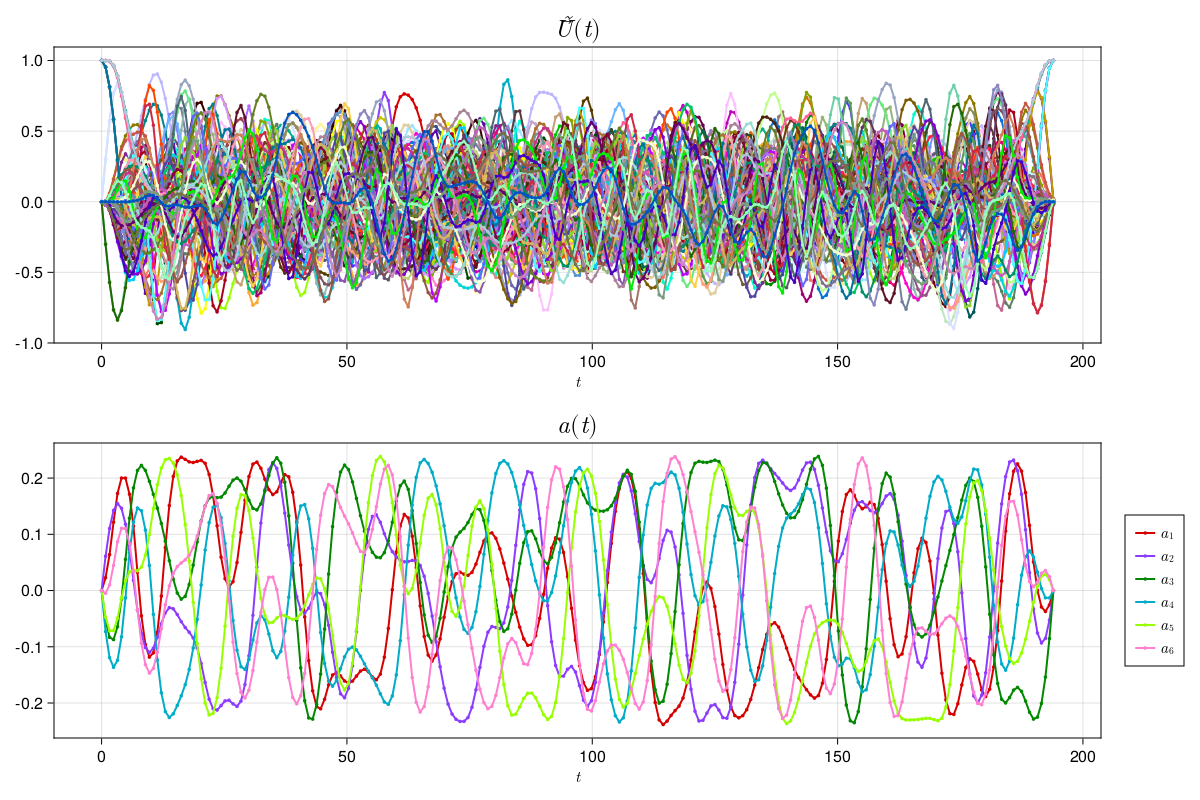

In [5]:
plot(traj, [:Ũ⃗, :a]; ignored_labels=[:Ũ⃗])

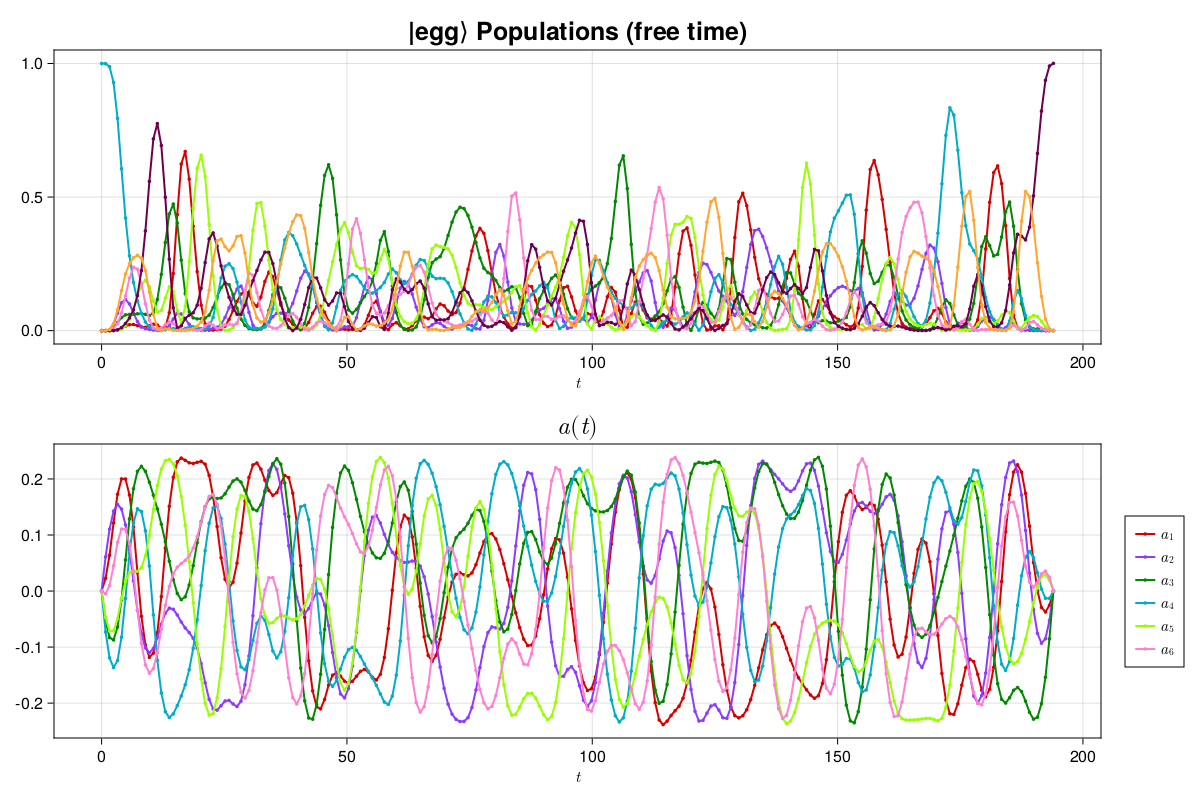

In [6]:
transformation = OrderedDict(
   :Ũ⃗ => [x -> populations(iso_vec_to_operator(x)[:, 4])]
)
titles = OrderedDict(:Ũ⃗ => ["|egg⟩ Populations (free time)"])
plot(traj, [:a]; transformations=transformation, transformation_titles=titles, ignored_labels=[:Ũ⃗])

## Load the min-time solution

In [7]:
mintime_path = "results_mintime/T_240_init_duration_100.0_max_iter_250_00000_final_fidelity_0.999_00000.jld2"


"results_mintime/T_240_init_duration_100.0_max_iter_250_00000_final_fidelity_0.999_00000.jld2"

In [8]:
mintime_data = load_problem(mintime_path; return_data=true)

Loading data dict from results_mintime/T_240_init_duration_100.0_max_iter_250_00000_final_fidelity_0.999_00000.jld2:

   duration = 167.25319875233015
   fidelity = 0.9989918305344148


Dict{String, Any} with 7 entries:
  "options"     => Options{Float64}(1.0e-8, 100.0, 200, 1.0e6, 1.0, 1.0e-6, 0.0…
  "duration"    => 167.253
  "integrators" => AbstractIntegrator[UnitaryPadeIntegrator{Float64}(sparse([1,…
  "fidelity"    => 0.998992
  "params"      => Dict{Symbol, Any}(:eval_hessian=>true, :objective_terms=>Dic…
  "system"      => QuantumSystem{Float64}([0.0 0.0 … 0.0 0.0; 0.0 -0.376991 … 0…
  "trajectory"  => NamedTrajectory{Float64}([1.0 1.0 … 0.996223 0.999105; 0.0 2…

In [9]:
mintime_traj = mintime_data["trajectory"]

NamedTrajectory{Float64}([1.0 1.0000000000005849 … 0.9962226633583676 0.9991053884431931; 0.0 2.3826079015130747e-14 … 0.06362283138690274 0.023386846962860617; … ; 0.04735635464318544 -0.03193215036135246 … -6.916450906507234e-6 -1.6214039382440618e-19; 0.6998041788770659 0.6998041788691456 … 0.6998041788799004 0.6998041788799004], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.042726575901337674, -0.00705936638828768, -0.09110010583162174, -2.5858180008833588e-18, 3.2041115436195333e-19, -2.9702279318522905e-18, 2.9002063335449026e-18, 7.041272521315919e-19, -1.6214039382440618e-19, 0.6998041788799004], 240, :Δt, 147, (Ũ⃗ = 128, a = 6, da = 6, dda = 6, Δt = 1, states = 140, controls = 7), (a = ([-0.25132741228718347, -0.25132741228718347, -0.25132741228718347, -0.25132741228718347, -0.25132741228718347, -0.25132741228718347], [0.25132741228718347, 0.25132741228718347, 0.25132741228718347, 0.25132741228718347, 0.25132741228718347, 0.25132741228718347]), dda = ([-0.05, -0.05, 

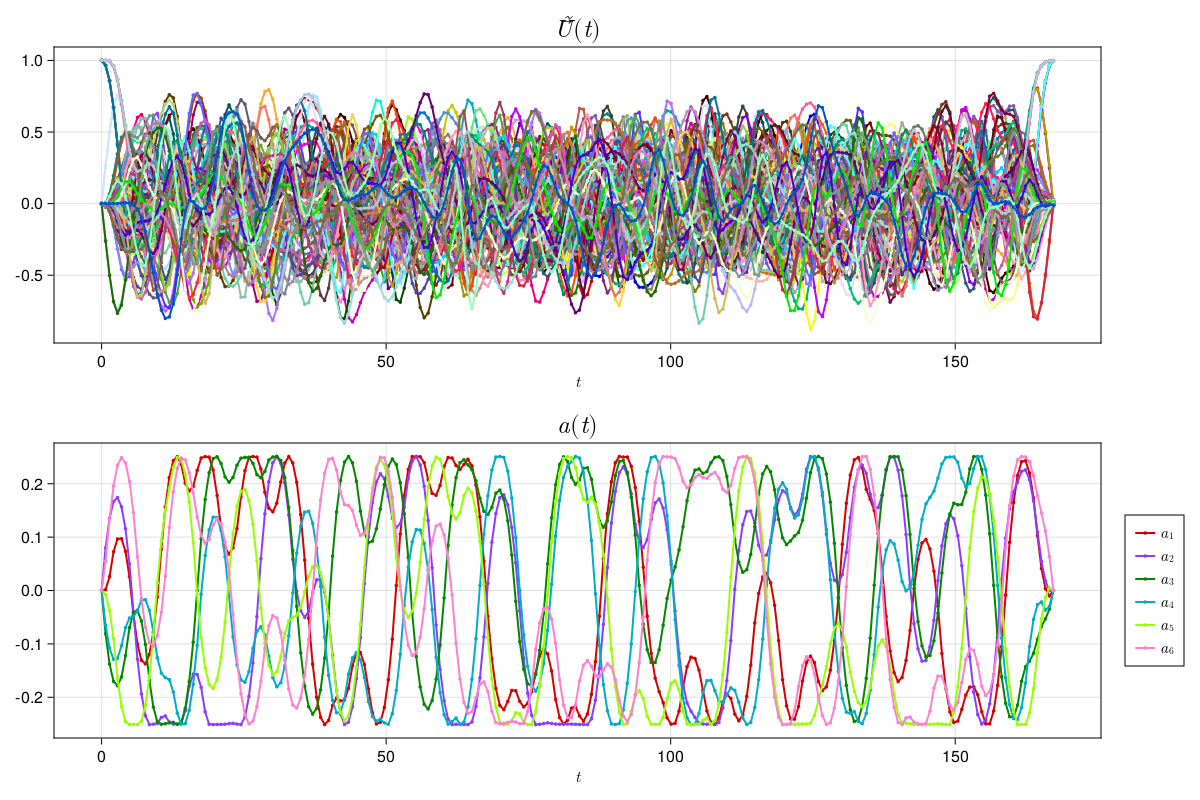

In [10]:
plot(mintime_traj, [:Ũ⃗, :a]; ignored_labels=[:Ũ⃗])

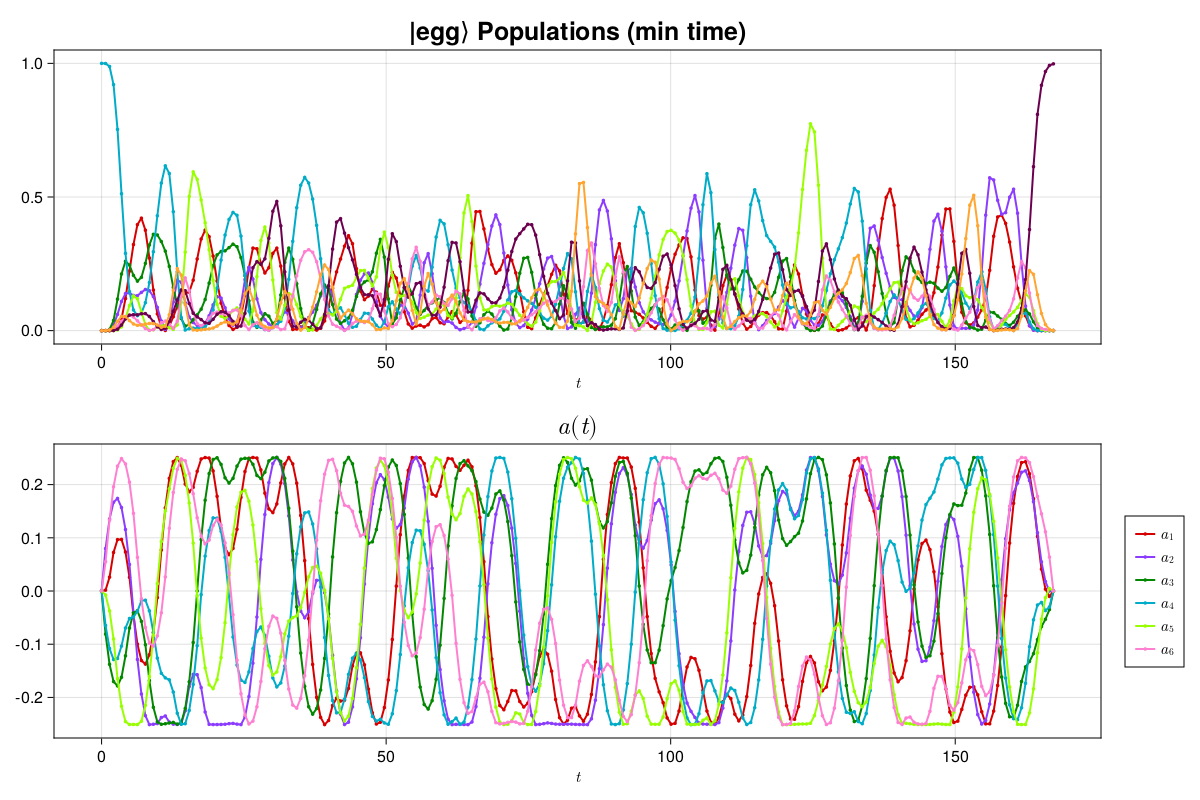

In [11]:
transformations = OrderedDict(
   :Ũ⃗ => [x -> populations(iso_vec_to_operator(x)[:, 4])]
)
titles = OrderedDict(:Ũ⃗ => ["|egg⟩ Populations (min time)"])
plot(mintime_traj, [:a]; transformations=transformations, transformation_titles=titles, ignored_labels=[:Ũ⃗])
